In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

Compute the number of distinct cache ways that are actually used when a number of cache line
corresponding to the number of ways is requested into the cache. The computation is assuming
random replacement strategy which is what processors seem to use.

In [3]:
def cachehits(nused, nrem, ntotal):
    if nrem == 0:
        return np.array([0]*nused + [1] + [0]*(ntotal-nused), dtype=int)
    return nused * cachehits(nused, nrem-1, ntotal) + \
           (ntotal-nused) * cachehits(nused+1, nrem-1, ntotal)

In [4]:
def run(n):
    return cachehits(0, n, n)/(n**n)

In [5]:
def avg(n):
    out = run(n)
    a = sum([i*out[i] for i in range(n+1)])
    plt.plot(range(1,n+1), out[1:])
    plt.axvline(x=a, color='k')
    return a

10.302813912771315

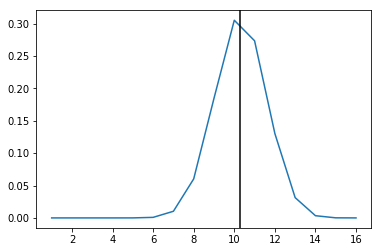

In [6]:
avg(16)